# **`Tensorboard for Tensorflow`**



This tutorial will show you step by step guide on how to use Tensorboard for Tensorflow. Tensorboard is a visualization tool provided by Tensorflow to visualize the training process of your model. It is very helpful to visualize the training process, model architecture, and other important details of your model.

## **`What is Tensorboard?`**

TensorBoard is a suite of visualization tools that makes it easier to understand, debug, and optimize TensorFlow programs. It includes a suite of tools for visualizing data flow graphs, profiling, and debugging TensorFlow programs.

## **`Why Tensorboard?`**

TensorBoard provides the visualization and tooling needed for machine learning experimentation:

- Tracking and visualizing metrics such as loss and accuracy
- Visualizing the model graph (ops and layers)
- Viewing histograms of weights, biases, or other tensors as they change over time
- Projecting embeddings to a lower-dimensional space
- Displaying images, text, and audio data
- Profiling input data and model structure
- Displaying profiled data, such as input pipeline processing time, model execution time, and how long each op takes

## **`How to use Tensorboard?`**

To use Tensorboard, you need to install Tensorflow and then you can use Tensorboard to visualize the training process of your model. Here is a step by step guide on how to use Tensorboard.

to install Tensorflow and tensorboard, you can use the following command.

```python
!pip install tensorflow
!pip intall tensorboard
```



Using TensorBoard for visualizing the training process of a simple neural network for basic rectangular data involves several steps. Below, I'll outline a basic example using TensorFlow and Keras to train a neural network on some rectangular data and visualize the training process using TensorBoard:

1. **Import necessary libraries**:

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
# ignore warnings in the output
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

2. **Prepare your data**:

For this example, let's assume you have some rectangular data stored in numpy arrays `X_train` and `y_train`.

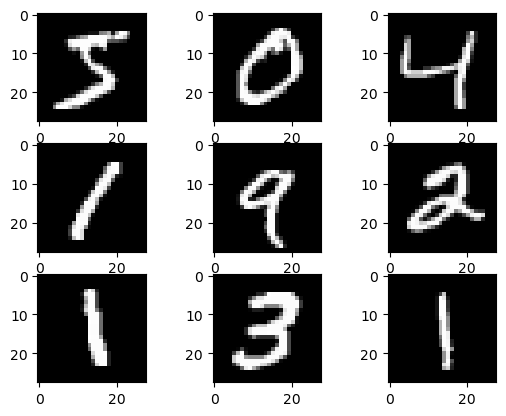

In [2]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist

# Split the dataset into training and testing sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# plot the first 9 images in the training set
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()


3. **Define your neural network model**:

In [3]:
# create the model using convolutional layers, max pooling layers, and a dropout layer
model = Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((1,1)),  # modify the pool size to match the output shape
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),  # add dropout layer with a dropout rate of 0.2
    tf.keras.layers.Dense(10, activation='softmax')
])

4. **Compile your model**:

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.5671 - loss: 1.2251 - val_accuracy: 0.9307 - val_loss: 0.2484
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8613 - loss: 0.4376 - val_accuracy: 0.9572 - val_loss: 0.1491
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8959 - loss: 0.3258 - val_accuracy: 0.9692 - val_loss: 0.1131
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9116 - loss: 0.2758 - val_accuracy: 0.9711 - val_loss: 0.0961
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9177 - loss: 0.2531 - val_accuracy: 0.9756 - val_loss: 0.0800
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9698 - loss: 0.0981
Test accuracy: 0.975600004196167


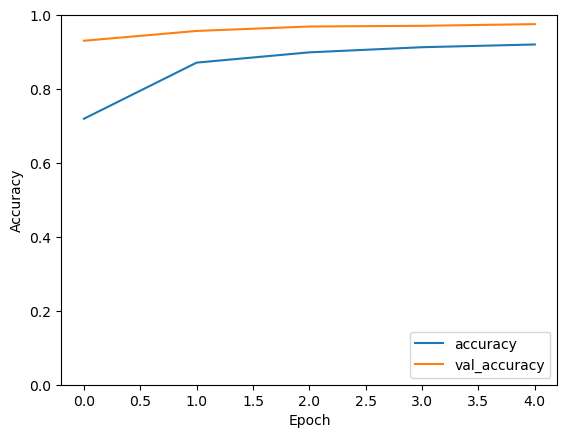

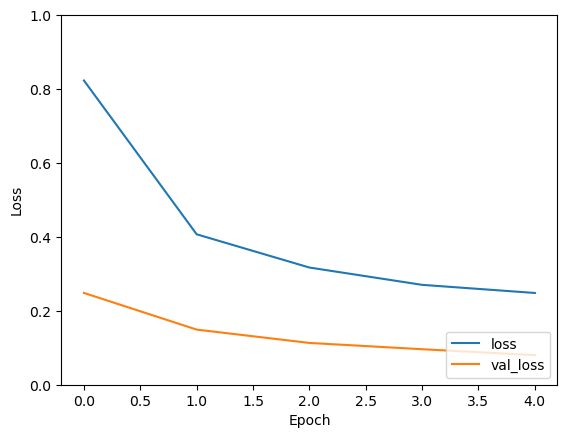

In [4]:
# compile the model 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# plot the training and validation accuracy and loss at each epoch
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

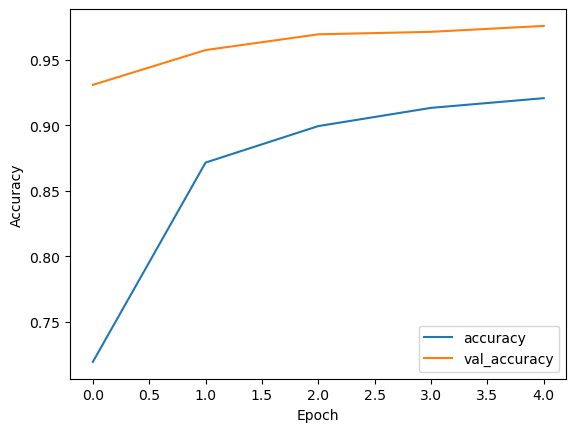

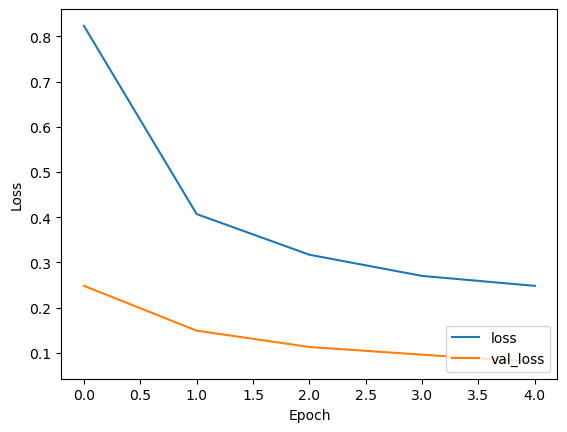

In [5]:
# plot the training and validation accuracy and loss at each epoch
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

`Lets's do it with tensorboard`

In [6]:
# create the model using convolutional layers, max pooling layers, and a dropout layer
model = Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((1,1)),  # modify the pool size to match the output shape
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),  # add dropout layer with a dropout rate of 0.2
    tf.keras.layers.Dense(10, activation='softmax')
])
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

5. **Set up TensorBoard callback**:

In [ ]:
# Clear any logs from previous runs
# !rm -rf ./logs/

In [7]:
log_dir = r"D:\Drive D\One drive folder\OneDrive - Higher Education Commission\Drive G\Data science coding\VSCode programming\logs_adam"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

6. **Train your model**:

In [8]:
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test,y_test), callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 13ms/step - accuracy: 0.5491 - loss: 1.2642 - val_accuracy: 0.9427 - val_loss: 0.2245
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.8294 - loss: 0.5268 - val_accuracy: 0.9573 - val_loss: 0.1629
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8575 - loss: 0.4492 - val_accuracy: 0.9666 - val_loss: 0.1258
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8721 - loss: 0.4023 - val_accuracy: 0.9688 - val_loss: 0.1280
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8783 - loss: 0.3861 - val_accuracy: 0.9702 - val_loss: 0.1148


7. **Run TensorBoard**:

Open a terminal and navigate to your working directory. Then run:


In [9]:
# Activate inline tensorboard extension
%load_ext tensorboard

In [11]:
# run tensorboad in the notebook try using with and without %sign
%tensorboard --logdir="D:\Drive D\One drive folder\OneDrive - Higher Education Commission\Drive G\Data science coding\VSCode programming\logs_adam"

Reusing TensorBoard on port 6006 (pid 13276), started 0:00:09 ago. (Use '!kill 13276' to kill it.)

8. **Visualize training progress**:

Once TensorBoard is running, you can navigate to the Scalars tab to visualize metrics like loss and accuracy over training epochs. You can also explore other tabs like Graphs, Histograms, and Distributions to gain insights into your model's structure and behavior.

That's it! This is a basic example of how to use TensorBoard to visualize the training process of a simple neural network for rectangular data. You can further customize the TensorBoard callback to log additional information or use more advanced features as needed.

9. **Hyper parameter Tuning and visualization**:

In [ ]:
# create the model using convolutional layers, max pooling layers, and a dropout layer
model = Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((1,1)),  # modify the pool size to match the output shape
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),  # add dropout layer with a dropout rate of 0.2
    tf.keras.layers.Dense(10, activation='softmax')
])
# compile the model with SGD optimizer
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tensorboard_callback = TensorBoard(log_dir='./logs/SGD', histogram_freq=1)
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test,y_test), callbacks=[tensorboard_callback])
%tensorboard --logdir=./logs

# Hyper-Paramter Tuning and Visualization using Tensorboard

In [15]:
# Define different optimizers
optimizers = ['SGD', 'Adam']
# optimizer = ['SGD', 'Adam', 'RMSprop', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']

# Train the model with different optimizers and store each optimizer in a different callback function
for optimizer in optimizers:
    model = Sequential([
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((1,1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Define different batch sizes
    batch_sizes = [16, 32, 64, 128]
    
    # Train the model with different batch sizes and store each batch size in a different callback function
    for batch_size in batch_sizes:
        log_dir = r"D:\Drive D\One drive folder\OneDrive - Higher Education Commission\Drive G\Data science coding\VSCode programming\logs_adam/{optimizer}_batch_size_{batch_size}"
        tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
        model.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_data=(X_test,y_test), 
                  callbacks=[tensorboard_callback])

# Load the TensorBoard notebook extension
%load_ext tensorboard



Epoch 1/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - accuracy: 0.4952 - loss: 1.4162 - val_accuracy: 0.9294 - val_loss: 0.2520
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.8394 - loss: 0.4814 - val_accuracy: 0.9508 - val_loss: 0.1720
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.8774 - loss: 0.3692 - val_accuracy: 0.9637 - val_loss: 0.1280
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 36s 10ms/step - accuracy: 0.8986 - loss: 0.3015 - val_accuracy: 0.9702 - val_loss: 0.1080
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - accuracy: 0.9054 - loss: 0.2781 - val_accuracy: 0.9693 - val_loss: 0.1014
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9176 - loss: 0.2475 - val_accuracy: 0.9749 - val_loss: 0.0874
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.9183 - loss: 0.2406 - val_accuracy: 0.9740 - val_loss: 0.0893
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9206 - loss: 0.

In [22]:
# Run TensorBoard
%tensorboard --logdir=log_dir = r"D:\Drive D\One drive folder\OneDrive - Higher Education Commission\Drive G\Data science coding\VSCode programming\logs_adam/{optimizer}_batch_size_{batch_size}"

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2024-07-20 18:20:04.717322: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-20 18:20:06.376119: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]

# **`Run Hyperparameter tuning and save the best model using TensorBoard.`**

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Import the ModelCheckpoint callback
# Define different optimizers
optimizers = ['SGD', 'Adam']
# optimizers = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']

# Train the model with different optimizers and store each optimizer in a different callback function
for optimizer in optimizers:
    model = Sequential([
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(10, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((1,1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Define different batch sizes
    batch_sizes = [16, 32, 64, 128]
    
    # Train the model with different batch sizes and store each batch size in a different callback function
    for batch_size in batch_sizes:
        log_dir =  r'D:\Drive D\One drive folder\OneDrive - Higher Education Commission\Drive G\Data science coding\VSCode programming'
        
        # Define the ModelCheckpoint callback to save the best model based on validation accuracy
        checkpoint_callback = ModelCheckpoint(filepath=r'D:\Drive D\One drive folder\OneDrive - Higher Education Commission\Drive G\Data science coding\VSCode programming\best_model_{}_batch_size_{}.keras'.format(optimizer, batch_size),
                                              monitor='val_accuracy',
                                              save_best_only=True,
                                              mode='max',
                                              verbose=1)
        
        tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
        
        # Train the model with the callbacks
        model.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_data=(X_test,y_test), callbacks=[tensorboard_callback, checkpoint_callback])

# Load the TensorBoard notebook extension
%load_ext tensorboard

# Run TensorBoard
%tensorboard --logdir=r'D:\Drive D\One drive folder\OneDrive - Higher Education Commission\Drive G\Data science coding\VSCode programming'

Epoch 1/5
3743/3750 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4517 - loss: 1.5103
Epoch 1: val_accuracy improved from -inf to 0.93240, saving model to D:\Drive D\One drive folder\OneDrive - Higher Education Commission\Drive G\Data science coding\VSCode programming\best_model_SGD_batch_size_16.keras
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 37s 9ms/step - accuracy: 0.4521 - loss: 1.5092 - val_accuracy: 0.9324 - val_loss: 0.2440
Epoch 2/5
3744/3750 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8117 - loss: 0.5265
Epoch 2: val_accuracy improved from 0.93240 to 0.95450, saving model to D:\Drive D\One drive folder\OneDrive - Higher Education Commission\Drive G\Data science coding\VSCode programming\best_model_SGD_batch_size_16.keras
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 29s 8ms/step - accuracy: 0.8117 - loss: 0.5265 - val_accuracy: 0.9545 - val_loss: 0.1715
Epoch 3/5
3744/3750 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8396 - loss: 0.4410
Epoch 3: val_accuracy improved from 0.95450 to 0.96230, savi

In [30]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [31]:
# Run TensorBoard
%tensorboard --logdir=r'D:\Drive D\One drive folder\OneDrive - Higher Education Commission\Drive G\Data science coding\VSCode programming'

Reusing TensorBoard on port 6007 (pid 10836), started 2:23:43 ago. (Use '!kill 10836' to kill it.)